In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
mobile= keras.applications.mobilenet.MobileNet()

In [ ]:
def prepare_image(file):
  img_path=r'/content/'
  img=image.load_img(img_path + file , target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array_expanded_dims=np.expand_dims(img_array , axis=0)
  return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
#/content/image8.jpeg

In [ ]:
!pip install Ipython

In [ ]:
#from Ipython.display import Image
#Image('/content/image8.jpeg',width=300,height=300) /content/149SP11SUB011.jpg
preprocessed_image=prepare_image('149SP11SUB011.jpg')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 0us/step


[[('n11879895', 'rapeseed', 0.42141157),
  ('n13133613', 'ear', 0.2923044),
  ('n12144580', 'corn', 0.17022833),
  ('n03496892', 'harvester', 0.04798791),
  ('n07802026', 'hay', 0.012195157)]]

In [ ]:
!unzip '/content/test.zip'
!unzip '/content/valid.zip'
!unzip '/content/train.zip'

Archive:  /content/test.zip
   creating: test/bajra/
  inflating: test/bajra/1511340347-4701.jpg  
  inflating: test/bajra/1583912022_Jowar_big_2.jpg  
  inflating: test/bajra/2aa98bcad23f92a695505239de73d941.jpg  
  inflating: test/bajra/49ba5b2c0360ba0658fdacd4e94b6ec4.jpg  
  inflating: test/bajra/5000-hybrid-pioneer-86m11-bajra-seeds-pearl-millet-seeds-1-5kg-original-imaft7xedxesp9aa.jpeg  
  inflating: test/bajra/5000-trimurti-tmbh-2652-bajra-seeds-pearl-millet-seeds-1-5kg-original-imaft8gvykbfke5n.jpeg  
  inflating: test/bajra/531f61_42baae386ec44ea7bdda77804c5feefemv2_d_2992_2000_s_2.jpg  
  inflating: test/bajra/853476-bajra-072919.jpg  
  inflating: test/bajra/8b9f17943f53dab4aa225b9235552ab2.jpg  
  inflating: test/bajra/bajra.jpg    
  inflating: test/bajra/bajra0.jpg   
  inflating: test/bajra/bajra21.jpg  
  inflating: test/bajra/Bajra-Cultivation.jpg  
   creating: test/banana/
  inflating: test/banana/images (38).jpg  
  inflating: test/banana/images (39).jpg  
  inflat

In [ ]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='confusion_matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes ,rotation=45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm=cm.astype('float')/cm.sum(axis)[:,np.newaxis]
  print(cm)
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j ,i , cm[i,j]
             , horizontalalignment='center',
             color='white' if cm[i,j] else 'black')
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

In [ ]:
train_path='/content/train'
test_path='/content/test'
valid_path='/content/valid'

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path,target_size=(224,224),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path,target_size=(224,224),batch_size=10,shuffle=False)
valid_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path,target_size=(224,224),batch_size=10)

Found 2137 images belonging to 21 classes.
Found 273 images belonging to 21 classes.
Found 268 images belonging to 21 classes.


In [ ]:
test_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path,target_size=(224,224),batch_size=273,shuffle=False)

Found 273 images belonging to 21 classes.


In [ ]:
moblie = keras.applications.mobilenet.MobileNet()


In [ ]:
moblie.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
x=mobile.layers[-6].output
predictions=Dense(21,activation='softmax')(x)

In [ ]:
model=Model(inputs=mobile.input,outputs=predictions)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [ ]:
for layers in model.layers[:-36]:
  layers.trainable=False

In [ ]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_fine = model.fit_generator(train_batches , steps_per_epoch=18 ,
                    validation_data=valid_batches , validation_steps =3 , epochs =60 , verbose =2)

Epoch 1/60
 - 30s - loss: 2.9783 - accuracy: 0.1778 - val_loss: 2.8075 - val_accuracy: 0.2333
Epoch 2/60
 - 25s - loss: 1.8730 - accuracy: 0.4611 - val_loss: 2.2423 - val_accuracy: 0.3667
Epoch 3/60
 - 24s - loss: 1.2161 - accuracy: 0.6833 - val_loss: 1.8495 - val_accuracy: 0.5000
Epoch 4/60
 - 25s - loss: 0.9967 - accuracy: 0.7611 - val_loss: 1.2049 - val_accuracy: 0.7667
Epoch 5/60
 - 25s - loss: 0.6977 - accuracy: 0.8222 - val_loss: 1.0553 - val_accuracy: 0.6333
Epoch 6/60
 - 34s - loss: 0.7631 - accuracy: 0.8111 - val_loss: 0.4644 - val_accuracy: 0.5667
Epoch 7/60
 - 34s - loss: 0.5634 - accuracy: 0.8611 - val_loss: 1.3441 - val_accuracy: 0.7000
Epoch 8/60
 - 30s - loss: 0.4665 - accuracy: 0.8611 - val_loss: 1.1413 - val_accuracy: 0.7333
Epoch 9/60
 - 30s - loss: 0.4936 - accuracy: 0.8814 - val_loss: 1.0184 - val_accuracy: 0.8929
Epoch 10/60
 - 27s - loss: 0.5470 - accuracy: 0.8167 - val_loss: 1.0234 - val_accuracy: 0.7667
Epoch 11/60
 - 24s - loss: 0.4508 - accuracy: 0.8667 - val_

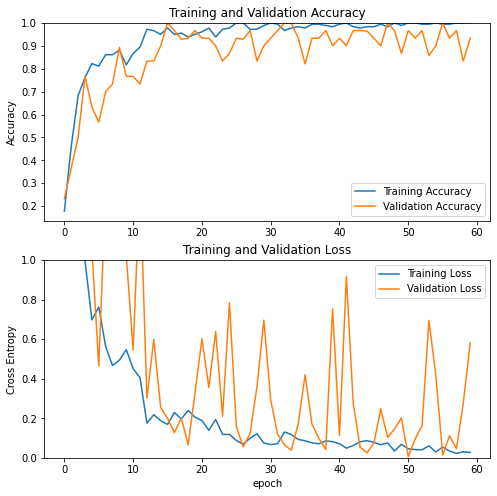

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
preprocessed_image=prepare_image('/image8.jpeg')
predictions=model.predict(preprocessed_image)
#results=imagenet_utils.decode_predictions(predictions)
print(predictions)

In [ ]:
test_labels=test_batches.classes
predictions=model.predict_generator(test_batches, steps = 1 , verbose = 2)
#print(predictions.argmax(axis=0))
#print(test_labels)
cm=confusion_matrix(test_labels ,predictions.argmax(axis=1))
print(test_batches.class_indices)

{'bajra': 0, 'banana': 1, 'bitter_gourd': 2, 'bottlegourd': 3, 'cabbage': 4, 'chilli': 5, 'coconut': 6, 'corn': 7, 'cotton': 8, 'jute': 9, 'orange': 10, 'papaya': 11, 'ragi': 12, 'rice': 13, 'sesame': 14, 'sorghum': 15, 'sugarcane': 16, 'sunflower': 17, 'tea': 18, 'tobacco': 19, 'wheat': 20}


[[10  0  0  0  0  0  0  2  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0 10  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1  0 10  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  1  0  0  0  1  0]
 [ 0  0  0

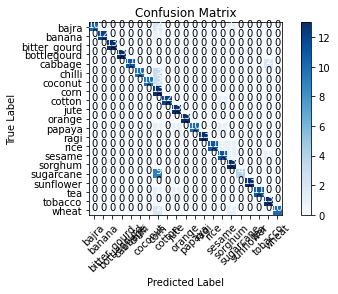

In [ ]:
cm_plot_labels=test_batches.class_indices.keys()
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

# model converter


In [ ]:
model_json = model.to_json()
with open("/content/mobilenet_cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/mobilenet_cnn.h5")
print("Saved model")

Saved model


In [ ]:
import tensorflow as tf
#from tensorflow.contrib import lite
converter = tf.lite.TFLiteConverter.from_keras_model_file( 'mobilenet_dcnn.h5' ) 
model = converter.convert()
file = open( 'mobilenet_dcnn.tflite' , 'wb' ) 
file.write( model )
'''
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file( r'/content/drive/My Drive/inceptionv3-transfer-learning__fine_tune.h5') # Your model's name
model = converter.convert()
file = open( 'model.tflite' , 'wb' )
file.write( model )'''

In [ ]:
import tensorflow as tf
from keras.initializers import glorot_uniform
from numpy import loadtxt
import keras
from keras.models import load_model


with open('/content/mobilenet_cnn.json', 'r') as json_file:
    json_savedModel= json_file.read()
 
model_j = tf.keras.models.model_from_json(json_savedModel)
model_j.summary()

model_j.load_weights('/content/mobilenet_cnn.h5')

model_j.summary()


converter = tf.lite.TFLiteConverter.from_keras_model(model_j)
tflite_buffer = converter.convert()
open( '/content/mobilenet_dcnn.tflite' , 'wb' ).write( tflite_buffer )

print("Success")

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [ ]:
try:
  %tensorflow_version 1.x
except Exception:
  pass
import tensorflow as tf
#assert tf.__version__.startswith('1')

tf.enable_eager_execution()


TensorFlow is already loaded. Please restart the runtime to change versions.


AttributeError: ignored

In [ ]:


'''saved_keras_model = '/content/mobilenet_cnn.h5'
#model.save(saved_keras_model)

converter = tf.lite.TFLiteConverter.from_keras_model_file(saved_keras_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('mobilenet_v2_1.0_224.tflite', 'wb') as f:
  f.write(tflite_model)'''


def representative_data_gen():
  dataset_list = tf.data.Dataset.list_files('/content/train' + '/*/*')
  for i in range(100):
    image = next(iter(dataset_list))
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image = tf.cast(image / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

saved_keras_model = '/content/mobilenet_cnn.h5'
model.save(saved_keras_model)

converter = tf.lite.TFLiteConverter.from_keras_model_file(saved_keras_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

converter.representative_dataset = representative_data_gen
tflite_model = converter.convert()

with open('mobilenet_v2_1.0_224_quant.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
print (train_batches.class_indices)

labels = '\n'.join(sorted(train_batches.class_indices.keys()))

with open('mobilenet_dcnn_21.txt', 'w') as f:
  f.write(labels)

{'bajra': 0, 'banana': 1, 'bitter_gourd': 2, 'bottlegourd': 3, 'cabbage': 4, 'chilli': 5, 'coconut': 6, 'corn': 7, 'cotton': 8, 'jute': 9, 'orange': 10, 'papaya': 11, 'ragi': 12, 'rice': 13, 'sesame': 14, 'sorghum': 15, 'sugarcane': 16, 'sunflower': 17, 'tea': 18, 'tobacco': 19, 'wheat': 20}
